In [2]:
from os import listdir
from PIL import Image
from kagglehub import dataset_download
from keras import Model, Input
from keras.layers import MaxPool2D
from keras.src.applications.inception_v3 import InceptionV3
from keras.src.layers import (
    GlobalAveragePooling2D,
    Dense,
    Conv2D,
    AveragePooling2D,
    Flatten,
    Dropout,
    concatenate,
)
from keras.src.legacy.preprocessing.image import ImageDataGenerator
from keras.src.utils import to_categorical
from keras.utils import load_img
from matplotlib import pyplot
from numpy import zeros, asarray, argmax, array
from seaborn import heatmap
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [3]:
dataset_path = dataset_download("abhinavnayak/catsvdogs-transformed")
print("Path to dataset files:", dataset_path)

100%|██████████| 16.6M/16.6M [00:11<00:00, 1.49MB/s]

Extracting files...


Path to dataset files: C:\Users\moham\.cache\kagglehub\datasets\abhinavnayak\catsvdogs-transformed\versions\1


In [4]:
data_path: str = f"{dataset_path}/train_transformed/"
print(data_path)

C:\Users\moham\.cache\kagglehub\datasets\abhinavnayak\catsvdogs-transformed\versions\1/train_transformed/


In [5]:
list_of_images = listdir(data_path)
number_of_images: int = len(list_of_images)
print(number_of_images)

2000


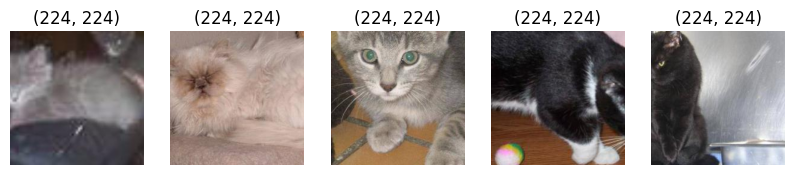

In [6]:
i = 1
pyplot.figure(figsize=(10, 10))
for image in list_of_images:
    if i > 5:
        break
    img = load_img(data_path + image)
    pyplot.subplot(1, 5, i)
    pyplot.imshow(img)
    pyplot.title(str(img.size))
    pyplot.axis("off")
    i += 1

pyplot.show()

In [7]:
images = zeros((number_of_images, 224, 224, 3))
labels = zeros((number_of_images, 1))

In [8]:
for image_number, image_path in enumerate(list_of_images):
    img = Image.open(data_path + image_path)
    img = asarray(img)
    img = img / img.max()
    images[image_number] = img
    labels[image_number] = 0 if "cat" in image_path else 1

In [9]:
print(labels)

[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [1.]]


In [10]:
labels = to_categorical(labels)

In [11]:
print(labels)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [12]:
images.shape

(2000, 224, 224, 3)

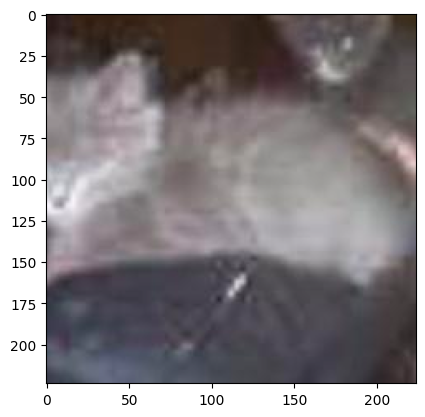

In [13]:
pyplot.imshow(images[0])

In [14]:
x_train, x_test, y_train, y_test = train_test_split(
    images, labels, test_size=0.2, random_state=42
)

In [15]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1600, 224, 224, 3), (400, 224, 224, 3), (1600, 2), (400, 2))

In [16]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [17]:
model = InceptionV3(
    include_top=False,
    weights="imagenet",
    input_shape=(224, 224, 3),
)

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 55s 1us/step


In [18]:
# Freeze the pre-trained layers
for layer in model.layers:
    layer.trainable = False

In [19]:
# Add layers using calls:
x = model.output  # Get the output of the InceptionV3 base
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation="relu")(x)
predictions = Dense(2, activation="softmax")(x)

In [20]:
# Create a new Functional model with these layers:
model = Model(inputs=model.input, outputs=predictions)

In [21]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [22]:
history = model.fit(x_train, y_train, epochs=50)

Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 18s 276ms/step - accuracy: 0.5284 - loss: 0.7882
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 16s 313ms/step - accuracy: 0.5912 - loss: 0.6640
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 16s 327ms/step - accuracy: 0.6310 - loss: 0.6405
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 16s 327ms/step - accuracy: 0.6288 - loss: 0.6467
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 16s 324ms/step - accuracy: 0.6539 - loss: 0.6262
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 27s 538ms/step - accuracy: 0.6144 - loss: 0.6388
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 17s 333ms/step - accuracy: 0.6348 - loss: 0.6368
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 16s 324ms/step - accuracy: 0.6531 - loss: 0.6171
Epoch 9/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 17s 335ms/step - accuracy: 0.6465 - loss: 0.6264
Epoch 10/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 16s 327ms/step - accuracy: 0.6378 - loss: 0.6289
Epoch 11/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 17s 329ms/step - accuracy: 0.6794 - loss: 0.5996
Epoch 12/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 16

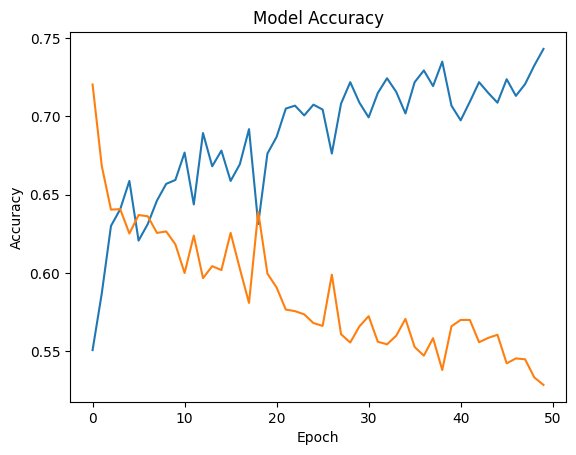

In [23]:
pyplot.plot(history.history["accuracy"])
pyplot.plot(history.history["loss"])
pyplot.title("Model Accuracy")
pyplot.ylabel("Accuracy")
pyplot.xlabel("Epoch")
pyplot.show()

In [24]:
model.evaluate(x_test, y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 342ms/step - accuracy: 0.6741 - loss: 0.5636


[0.5664899945259094, 0.6899999976158142]

In [ ]:
y_predict = model.predict(x_test)

In [ ]:
y_predict = argmax(y_predict, axis=1)
y_test = argmax(y_test, axis=1)

In [ ]:
cm = confusion_matrix(y_test, y_predict)
heatmap(cm, annot=True, fmt="d")

In [ ]:
cr = classification_report(y_test, y_predict)
print(cr)

# Model From Scratch

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=40,  # Degree range for random rotations
    width_shift_range=0.2,  # Fraction of the total width for horizontal shifts
    height_shift_range=0.2,  # Fraction of total height for vertical shifts
    shear_range=0.2,  # Shear intensity (shear angle in a counter-clockwise direction in degrees)
    zoom_range=0.2,  # Range for random zoom
    horizontal_flip=True,  # Randomly flip images horizontally
    fill_mode="nearest",  # Strategy for filling newly created pixels
)

NameError: name 'images' is not defined

In [ ]:
train_generator = datagen.flow(images, labels, batch_size=32)

In [ ]:
train_generator

In [ ]:
images = array(images)

In [ ]:
images.shape

In [ ]:
def inception_module(
    layer,
    filters_1x1,
    filters_3x3_reduce,
    filters_3x3,
    filters_5x5_reduce,
    filters_5x5,
    filters_pool_proj,
    name=None,
):
    conv_1x1 = Conv2D(filters_1x1, (1, 1), padding="same", activation="relu")(layer)

    conv_3x3 = Conv2D(filters_3x3_reduce, (1, 1), padding="same", activation="relu")(
        layer
    )
    conv_3x3 = Conv2D(filters_3x3, (3, 3), padding="same", activation="relu")(conv_3x3)

    conv_5x5 = Conv2D(filters_5x5_reduce, (1, 1), padding="same", activation="relu")(
        layer
    )
    conv_5x5 = Conv2D(filters_5x5, (5, 5), padding="same", activation="relu")(conv_5x5)

    pool_proj = MaxPool2D((3, 3), strides=(1, 1), padding="same")(layer)
    pool_proj = Conv2D(filters_pool_proj, (1, 1), padding="same", activation="relu")(
        pool_proj
    )

    output = concatenate([conv_1x1, conv_3x3, conv_5x5, pool_proj], axis=3, name=name)

    return output

In [ ]:
input_layer = Input(shape=(224, 224, 3))

x = Conv2D(
    64,
    (7, 7),
    padding="same",
    strides=(2, 2),
    activation="relu",
    name="conv_1_7x7/2",
)(input_layer)
x = MaxPool2D(
    (3, 3),
    padding="same",
    strides=(2, 2),
    name="max_pool_1_3x3/2",
)(x)
x = Conv2D(
    64,
    (1, 1),
    padding="same",
    strides=(1, 1),
    activation="relu",
    name="conv_2a_3x3/1",
)(x)
x = Conv2D(
    192,
    (3, 3),
    padding="same",
    strides=(1, 1),
    activation="relu",
    name="conv_2b_3x3/1",
)(x)
x = MaxPool2D(
    (3, 3),
    padding="same",
    strides=(2, 2),
    name="max_pool_2_3x3/2",
)(x)

x = inception_module(
    x,
    filters_1x1=64,
    filters_3x3_reduce=96,
    filters_3x3=128,
    filters_5x5_reduce=16,
    filters_5x5=32,
    filters_pool_proj=32,
    name="inception_3a",
)

x = inception_module(
    x,
    filters_1x1=128,
    filters_3x3_reduce=128,
    filters_3x3=192,
    filters_5x5_reduce=32,
    filters_5x5=96,
    filters_pool_proj=64,
    name="inception_3b",
)

x = MaxPool2D((3, 3), padding="same", strides=(2, 2), name="max_pool_3_3x3/2")(x)

x = inception_module(
    x,
    filters_1x1=192,
    filters_3x3_reduce=96,
    filters_3x3=208,
    filters_5x5_reduce=16,
    filters_5x5=48,
    filters_pool_proj=64,
    name="inception_4a",
)

x1 = AveragePooling2D((5, 5), strides=3)(x)
x1 = Conv2D(128, (1, 1), padding="same", activation="relu")(x1)
x1 = Flatten()(x1)
x1 = Dense(1024, activation="relu")(x1)
x1 = Dropout(0.7)(x1)
x1 = Dense(2, activation="softmax", name="auxiliary_output_1")(x1)

x = inception_module(
    x,
    filters_1x1=160,
    filters_3x3_reduce=112,
    filters_3x3=224,
    filters_5x5_reduce=24,
    filters_5x5=64,
    filters_pool_proj=64,
    name="inception_4b",
)

x = inception_module(
    x,
    filters_1x1=128,
    filters_3x3_reduce=128,
    filters_3x3=256,
    filters_5x5_reduce=24,
    filters_5x5=64,
    filters_pool_proj=64,
    name="inception_4c",
)

x = inception_module(
    x,
    filters_1x1=112,
    filters_3x3_reduce=144,
    filters_3x3=288,
    filters_5x5_reduce=32,
    filters_5x5=64,
    filters_pool_proj=64,
    name="inception_4d",
)

x2 = AveragePooling2D((5, 5), strides=3)(x)
x2 = Conv2D(128, (1, 1), padding="same", activation="relu")(x2)
x2 = Flatten()(x2)
x2 = Dense(1024, activation="relu")(x2)
x2 = Dropout(0.7)(x2)
x2 = Dense(2, activation="softmax", name="auxiliary_output_2")(x2)

x = inception_module(
    x,
    filters_1x1=256,
    filters_3x3_reduce=160,
    filters_3x3=320,
    filters_5x5_reduce=32,
    filters_5x5=128,
    filters_pool_proj=128,
    name="inception_4e",
)

x = MaxPool2D((3, 3), padding="same", strides=(2, 2), name="max_pool_4_3x3/2")(x)

x = inception_module(
    x,
    filters_1x1=256,
    filters_3x3_reduce=160,
    filters_3x3=320,
    filters_5x5_reduce=32,
    filters_5x5=128,
    filters_pool_proj=128,
    name="inception_5a",
)

x = inception_module(
    x,
    filters_1x1=384,
    filters_3x3_reduce=192,
    filters_3x3=384,
    filters_5x5_reduce=48,
    filters_5x5=128,
    filters_pool_proj=128,
    name="inception_5b",
)

x = GlobalAveragePooling2D(name="avg_pool_5_3x3/1")(x)
x = Dropout(0.4)(x)
x = Dense(2, activation="softmax", name="output")(x)

In [ ]:
model = Model(input_layer, [x, x1, x2], name="inception_v1")

In [ ]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
y_train.shape

In [ ]:
history = model.fit(train_generator, epochs=50)

In [ ]:
pyplot.plot(history.history["loss"])
pyplot.title("Model Loss/Accuracy")
pyplot.ylabel("Loss/Accuracy")
pyplot.xlabel("Epoch")
pyplot.show()

In [ ]:
y_test = to_categorical(y_test)

In [ ]:
y_test.shape

In [ ]:
y_test = argmax(y_test, axis=1)

In [ ]:
model.evaluate(x_test, y_test)

In [ ]:
x_test.shape, y_test.shape

In [ ]:
y_predict = model.predict(x_test)

In [ ]:
y_predict = array(y_predict)

In [ ]:
y_predict[0].shape

In [ ]:
y_predict = argmax(y_predict[0], axis=1)

In [ ]:
y_test.shape, y_predict.shape

In [ ]:
cm = confusion_matrix(y_test, y_predict)
heatmap(cm, annot=True, fmt="d")

In [ ]:
cr = classification_report(y_test, y_predict)
print(cr)